In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataset = pd.read_csv(url, usecols=[1], engine='python')
data = dataset.values.astype('float32')

In [3]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [4]:
# Prepare the data for RNN
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [5]:
look_back = 3
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
# Create and fit the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
140/140 - 2s - 11ms/step - loss: 0.0297
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.0129
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.0099
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.0071
Epoch 5/100
140/140 - 0s - 2ms/step - loss: 0.0069
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.0077
Epoch 7/100
140/140 - 0s - 2ms/step - loss: 0.0057
Epoch 8/100
140/140 - 0s - 2ms/step - loss: 0.0060
Epoch 9/100
140/140 - 0s - 2ms/step - loss: 0.0046
Epoch 10/100
140/140 - 0s - 2ms/step - loss: 0.0050
Epoch 11/100
140/140 - 0s - 2ms/step - loss: 0.0048
Epoch 12/100
140/140 - 0s - 2ms/step - loss: 0.0052
Epoch 13/100
140/140 - 0s - 2ms/step - loss: 0.0043
Epoch 14/100
140/140 - 0s - 2ms/step - loss: 0.0042
Epoch 15/100
140/140 - 0s - 2ms/step - loss: 0.0039
Epoch 16/100
140/140 - 0s - 2ms/step - loss: 0.0047
Epoch 17/100
140/140 - 0s - 2ms/step - loss: 0.0037
Epoch 18/100
140/140 - 0s - 2ms/step - loss: 0.0043
Epoch 19/100
140/140 - 0s - 2ms/step - loss: 0.0044
Epoch 20/100
140/140

In [7]:
# Make predictions
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
y_true = scaler.inverse_transform([y])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


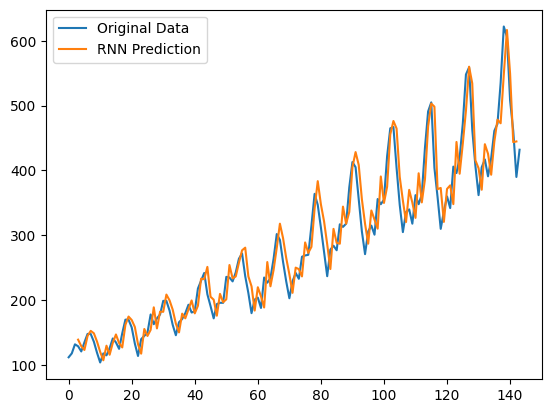

In [8]:
# Plot results
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data')
plt.plot(np.arange(look_back, len(train_predict) + look_back), train_predict, label='RNN Prediction')
plt.legend()
plt.show()

In [9]:
# Calculate performance
mse = mean_squared_error(y_true[0], train_predict.flatten())
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 902.6213856950653
